In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-06 20:48:49.137290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/jg/lkqyq8zj1cxg49bgvkxt3l2w0000gn/T/ipykernel_4068/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
training_Set = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testing_Set = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
randomLabelsTrain = torch.tensor(np.random.randint(0,10, (len(training_Set)),))
training_Set.targets = randomLabelsTrain
randomLabelsTest = torch.tensor(np.random.randint(0,10, (len(testing_Set)),))
testing_Set.targets = randomLabelsTest

train = torch.utils.data.DataLoader(training_Set, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testing_Set, batch_size=50, shuffle=True)

In [4]:
class random_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [5]:
random_Net = random_NN()
costFunc = nn.CrossEntropyLoss()
opt = optim.Adam(random_Net.parameters(), lr=0.001)

In [6]:
EPOCHS = 140
count = 0
countList = []
costList = []
testLossList = []
trainLossList = []
for index in range(EPOCHS):
    countList.append(count)
    count += 1
    print(index)
    for batch in train:
        inputImages, groundTruth = batch
        random_Net.zero_grad()
        output = random_Net(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        opt.step()
    costList.append(cost)
    
    trainTotal = 0
    traincount = 0
    with torch.no_grad():
        for batch in train: 
            inputImages, groundTruth = batch
            output = random_Net(inputImages.view(-1,784))
            cost = costFunc(output, groundTruth)
            trainTotal += cost
            traincount += 1
        trainTotal = trainTotal / traincount
        trainLossList.append(trainTotal)
    
    testTotal = 0
    testcount = 0
    with torch.no_grad():
        for batch in test: 
            inputImages, groundTruth = batch
            output = random_Net(inputImages.view(-1,784))
            cost = costFunc(output, groundTruth)
            testTotal += cost
            testcount += 1
        testTotal = testTotal / testcount
        testLossList.append(testTotal)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139


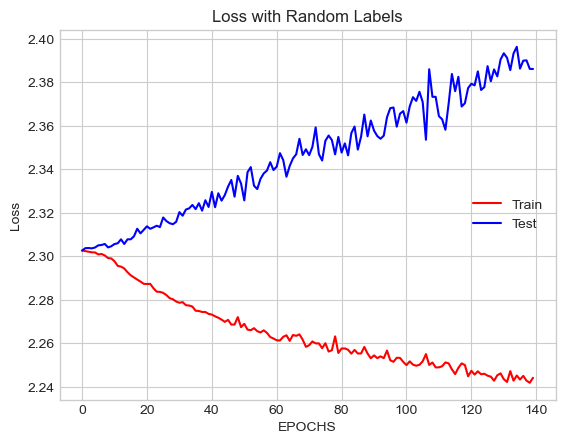

In [8]:
plt.plot(countList, trainLossList, 'r', label='Train')
plt.plot(countList, testLossList, 'b', label='Test')
plt.title("Loss with Random Labels")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend(loc="center right")
plt.savefig('LosswithRandonLabels.jpg')
plt.show()